## Deep Learning Assignment 2 Question 4

### Code for the learning function

This function returns a tuple: W: weight vector, and b: bias

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [212]:
# X: array of : (x1, x2, y). It **also** separately takes y
# W: weight vector
# b: bias
def percept_learn(X,W,b,y, epoch=10, alpha=0.2):
    i = 0
    while i<epoch:
        x = np.linspace(-6, 6, 100)
        plt.figure(i)
        plt.axvline(x=0)
        plt.axhline(y=0)
        
        plt.plot(x, (x*(-W[0]/W[1]))-b/W[1], 'g')
        plt.plot(X[:,0][y==0], X[:,1][y==0], 'bo')
        plt.plot(X[:,0][y==1], X[:,1][y==1], 'r^')
        
        changed=False
        for data in X:
            o = np.dot(data[:-1], W)
            o += b
            ans = 1 if o > 0 else 0
            
            if ans!=data[-1]:
                changed = True
                W = np.subtract(W, alpha*(ans-data[-1])*data[:-1])
                b = b - alpha*(ans-data[-1])
            
        if (not changed):
            break
        i+=1
        
        
        
    
    return (W, b)
    


## Generating Dataset

Have used this function to generate datasets. Repeat until you get linearly separable/not depending on requirement.
The data set has 100 points!

**Running this code again will change the data points. Please view the html file in order to see the original plots I obtained.**

### Linear Data Sets
#### (1)

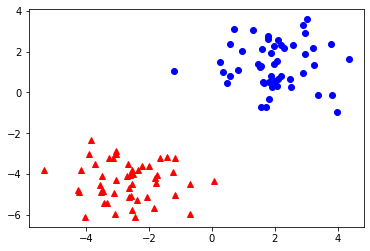

In [175]:
from sklearn import datasets

X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(-5, 2))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'bo')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'r^')
plt.show()



(array([-0.33844851, -0.33637284]), -0.20000000000000004)

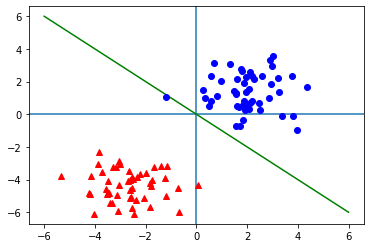

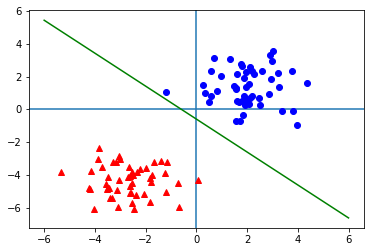

In [209]:
percept_learn(np.c_[X, y], np.array([1,1]), 0, y)

#### (2)

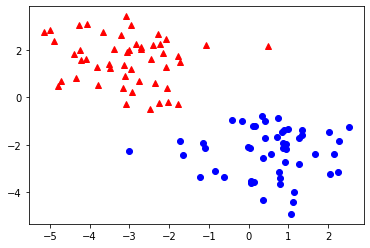

In [187]:
XL2, yl2 = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(-5, 2))
plt.plot(XL2[:, 0][yl2 == 0], XL2[:, 1][yl2 == 0], 'bo')
plt.plot(XL2[:, 0][yl2 == 1], XL2[:, 1][yl2 == 1], 'r^')
plt.show()


(array([-0.41208121,  1.20617588]), 0.2)

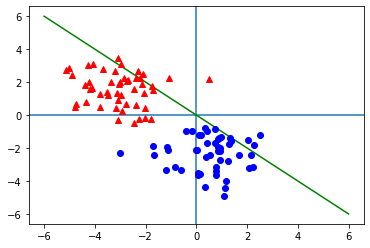

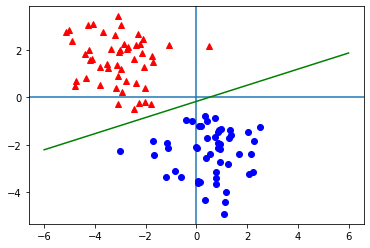

In [210]:
percept_learn(np.c_[XL2, yl2], np.array([1,1]), 0, yl2)

### Non-linear data sets
#### (1)

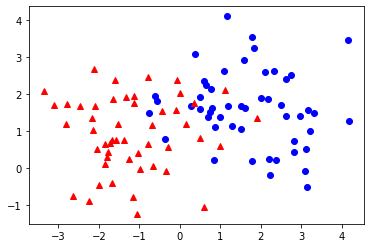

In [194]:
XN1, yn1 = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(-5, 2))
plt.plot(XN1[:, 0][yn1 == 0], XN1[:, 1][yn1 == 0], 'bo')
plt.plot(XN1[:, 0][yn1 == 1], XN1[:, 1][yn1 == 1], 'r^')
plt.show()


(array([-1.05439819, -0.46545904]), 1.0)

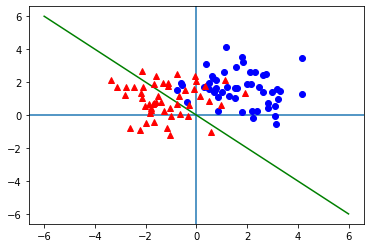

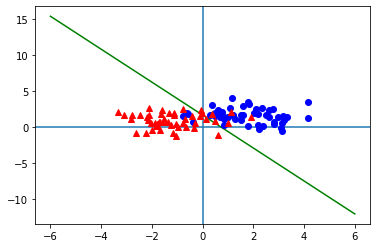

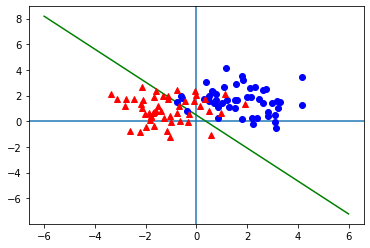

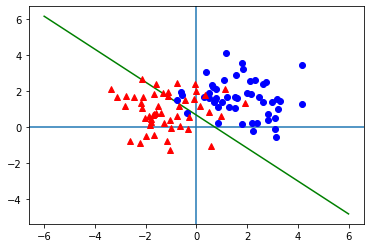

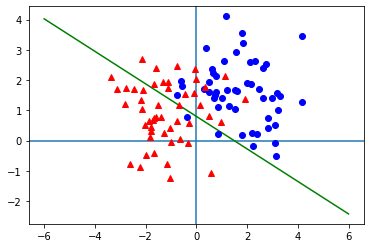

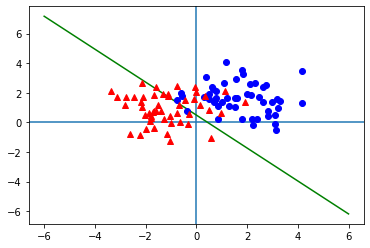

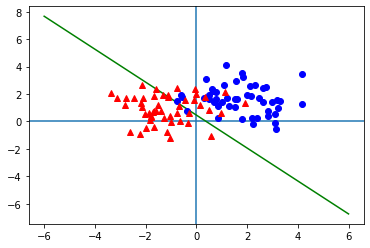

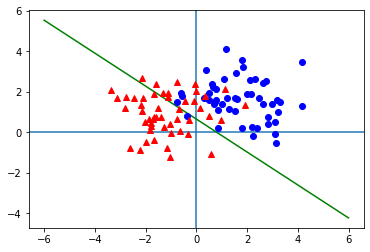

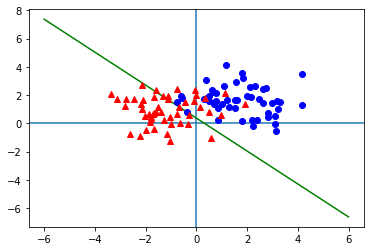

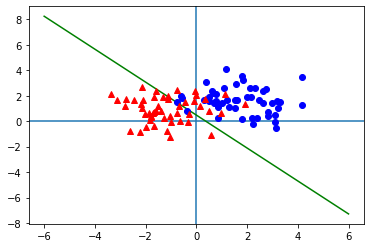

In [195]:
percept_learn(np.c_[XN1, yn1], np.array([1,1]), 0, yn1)

#### (2)

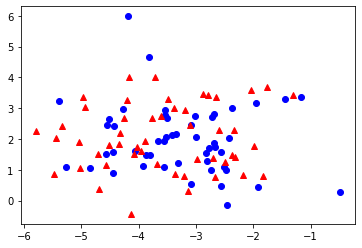

In [197]:
XN2, yn2 = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(-5, 2))
plt.plot(XN2[:, 0][yn2 == 0], XN2[:, 1][yn2 == 0], 'bo')
plt.plot(XN2[:, 0][yn2 == 1], XN2[:, 1][yn2 == 1], 'r^')
plt.show()


(array([ 0.7621389 , -0.71154871]), -2.0)

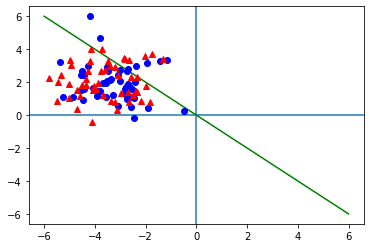

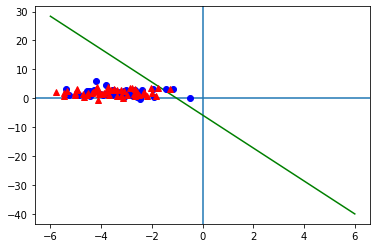

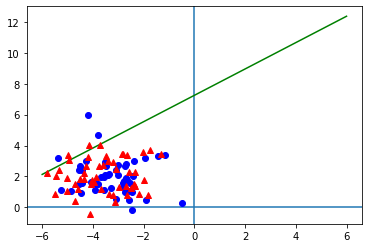

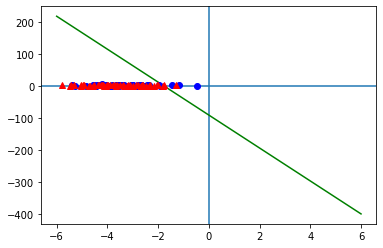

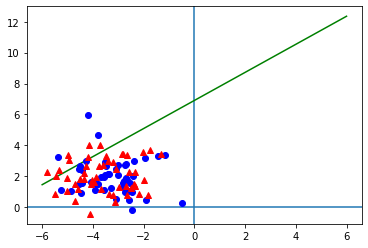

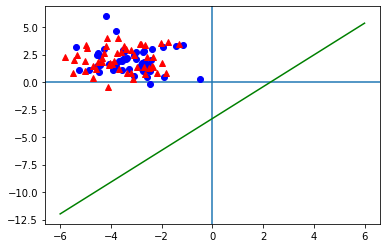

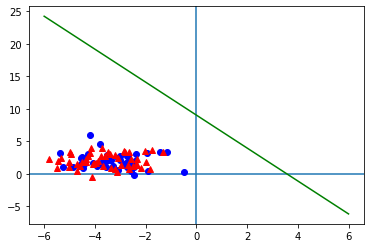

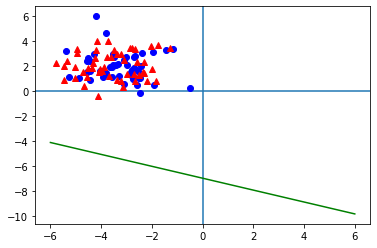

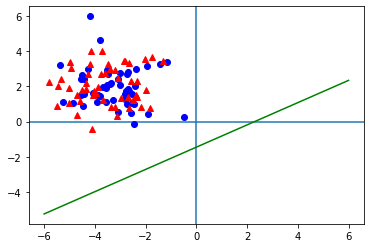

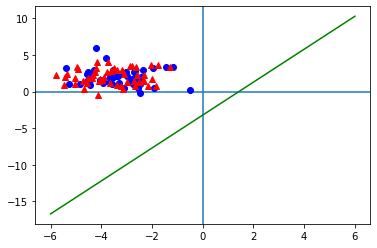

In [198]:
percept_learn(np.c_[XN2, yn2], np.array([1,1]), 0, yn2)

### Observations

Linearly separable datasets result in convergence.
Non-linearly separable datasets result in oscillation of the decision boundary. 

## Changing Weights

(array([-1.01144576, -1.73943766]), 2.7755575615628914e-16)

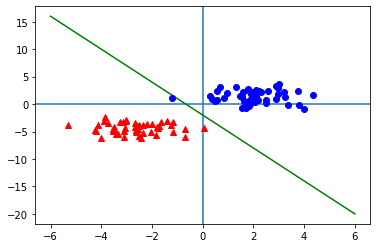

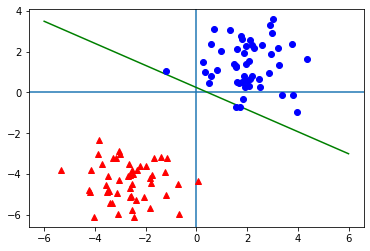

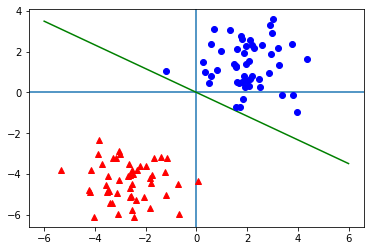

In [213]:
percept_learn(np.c_[X, y], np.array([3,1]), 2, y)

(array([-0.87472945,  3.90173145]), 2.9999999999999982)

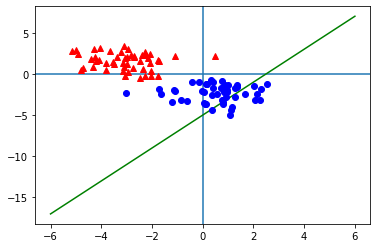

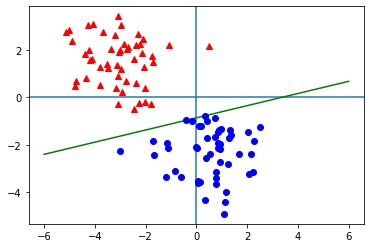

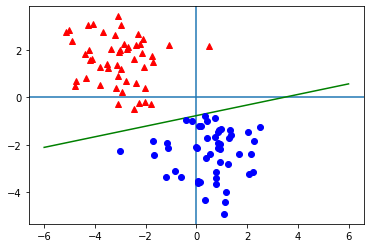

In [214]:
percept_learn(np.c_[XL2, yl2], np.array([-2,1]), 5, yl2)

(array([-0.53105617, -0.54687039]), 0.4000000000000001)

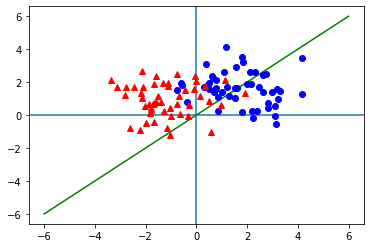

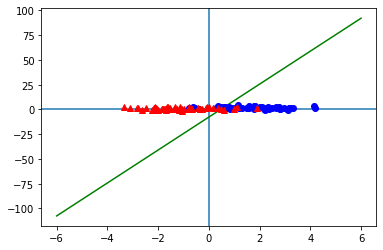

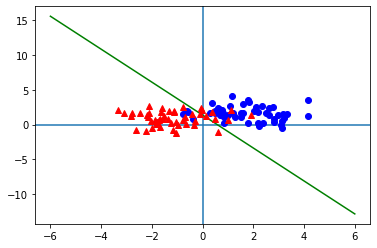

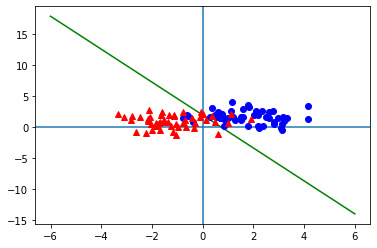

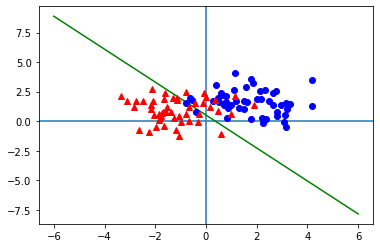

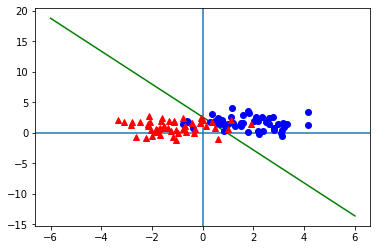

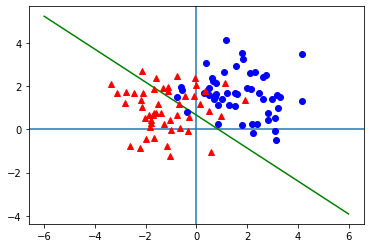

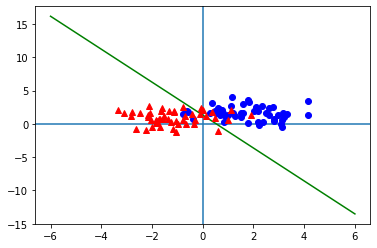

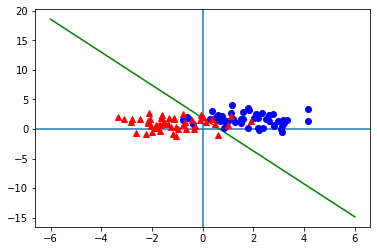

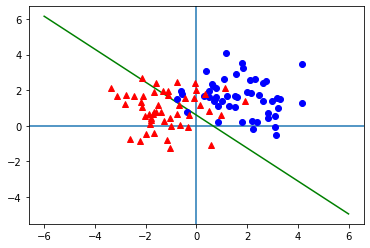

In [215]:
percept_learn(np.c_[XN1, yn1], np.array([-1,1]), 0, yn1)

(array([ 0.34167173, -0.19509632]), -0.8)

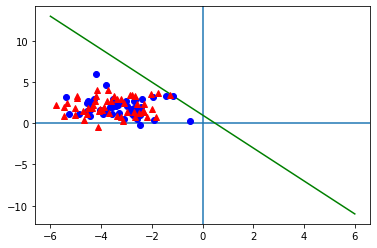

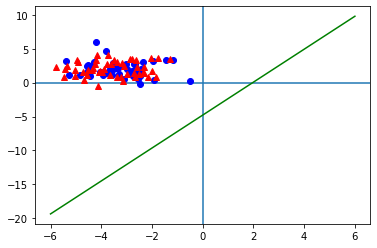

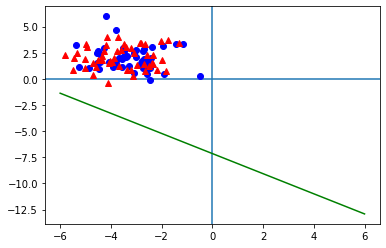

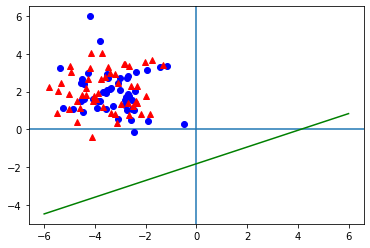

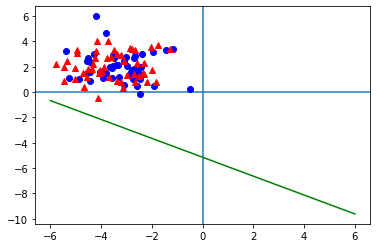

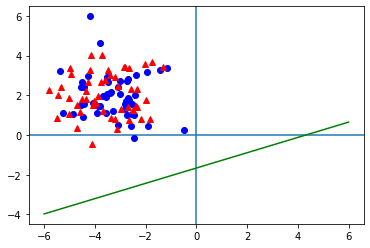

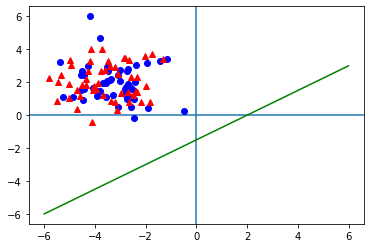

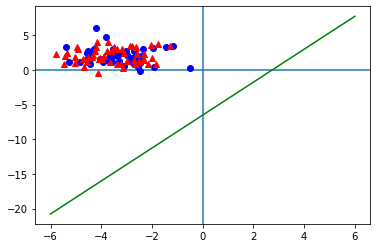

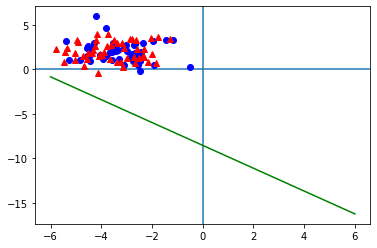

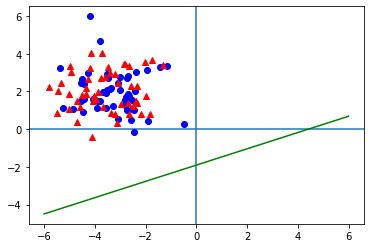

In [216]:
percept_learn(np.c_[XN2, yn2], np.array([2,1]), -1, yn2)

### Observations

**Yes**, decision boundaries are dependent on the initial weights.

Significant change is observed when changing the initial weights. 

For the linearly separable datasets, number of iterations required to converge changes with change in weights.
For non-linearly separable ones, the oscillating decision boundaries are changed.

## Comparison with SVM and Logistic Regression

### (1) First Linear Dataset

In [217]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [231]:
clf1 = SVC(kernel='linear')


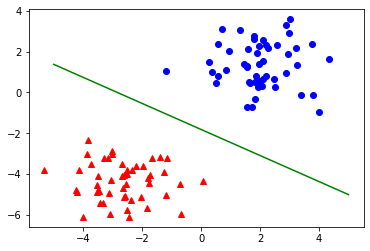

In [232]:
clf1.fit(X, y)
We = clf1.coef_[0]
I = clf1.intercept_

plt.plot(x, (x*(-We[0]/We[1]))-I[0]/We[1], 'g')
plt.plot(X[:,0][y==0], X[:,1][y==0], 'bo')
plt.plot(X[:,0][y==1], X[:,1][y==1], 'r^')

/home/supreets51/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


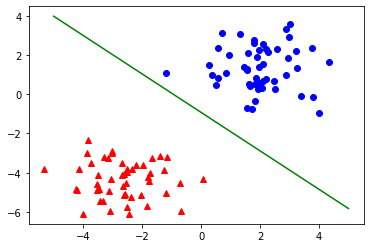

In [233]:
clf2 = LogisticRegression()
clf2.fit(X, y)
We = clf2.coef_[0]
I = clf2.intercept_

plt.plot(x, (x*(-We[0]/We[1]))-I[0]/We[1], 'g')
plt.plot(X[:,0][y==0], X[:,1][y==0], 'bo')
plt.plot(X[:,0][y==1], X[:,1][y==1], 'r^')

### First Non-linear Data Set

/home/supreets51/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


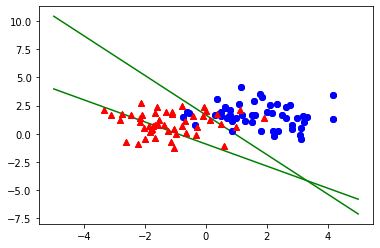

In [234]:
clf1 = SVC(kernel='linear')
clf1.fit(XN1, yn1)
We = clf1.coef_[0]
I = clf1.intercept_

plt.plot(x, (x*(-We[0]/We[1]))-I[0]/We[1], 'g')
plt.plot(XN1[:,0][yn1==0], XN1[:,1][yn1==0], 'bo')
plt.plot(XN1[:,0][yn1==1], XN1[:,1][yn1==1], 'r^')




/home/supreets51/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


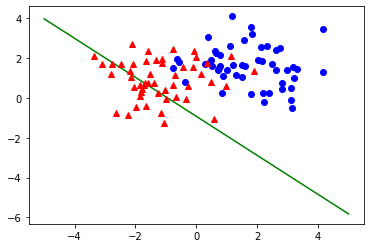

In [235]:
clf2 = LogisticRegression()
clf2.fit(X, y)
We = clf2.coef_[0]
I = clf2.intercept_

plt.plot(x, (x*(-We[0]/We[1]))-I[0]/We[1], 'g')
plt.plot(XN1[:,0][yn1==0], XN1[:,1][yn1==0], 'bo')
plt.plot(XN1[:,0][yn1==1], XN1[:,1][yn1==1], 'r^')

### Observations

SVM and Logistic regression converge to different decision boundaries. 

SVM converges to the same boundary, since it tries to maximize the distance between the two classes and the decision line. Logistic regression and the perceptron generate similar decision boundaries